In [1]:
import pandas as pd
import numpy as np
dftrain=pd.read_csv('/Users/rianrachmanto/pypro/project/Litho-Fluid-Id/data/raw/combined.csv')
print(dftrain.head())
print(dftrain.tail())
print(dftrain.dtypes)


    DEPTH       GR      RT    RHOB    NPHI  LITHO  FLUID
0  3230.5  73.0228  3.3699  1.8882  0.5958    6.0    NaN
1  3231.0  75.0225  2.7430  1.8206  0.6173    6.0    NaN
2  3231.5  79.9957  1.5419  1.7420  0.6041    6.0    NaN
3  3232.0  85.8545  1.2538  1.6872  0.5856    5.0    NaN
4  3232.5  82.7985  1.1966  1.6834  0.5819    5.0    NaN
          DEPTH     GR     RT  RHOB    NPHI  LITHO  FLUID
507618  13149.0  37.95  10.84  2.36  0.0883    6.0    NaN
507619  13149.5  37.95  10.84  2.36  0.0883    6.0    NaN
507620  13150.0  37.95  10.84  2.36  0.0883    6.0    NaN
507621  13150.5  37.95  10.84  2.36  0.0883    6.0    NaN
507622  13151.0  37.95  10.84  2.36  0.0883    6.0    NaN
DEPTH    float64
GR       float64
RT       float64
RHOB     float64
NPHI     float64
LITHO    float64
FLUID    float64
dtype: object


Shape of dftrain
(507623, 7)
Info of dftrain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507623 entries, 0 to 507622
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DEPTH   507623 non-null  float64
 1   GR      506898 non-null  float64
 2   RT      503726 non-null  float64
 3   RHOB    464333 non-null  float64
 4   NPHI    470396 non-null  float64
 5   LITHO   507623 non-null  float64
 6   FLUID   100189 non-null  float64
dtypes: float64(7)
memory usage: 27.1 MB
None
Describe of dftrain
               DEPTH             GR             RT           RHOB  \
count  507623.000000  506898.000000  503726.000000  464333.000000   
mean     7685.631464      71.568288      14.545387       2.277818   
std      3114.264406      28.243626     536.902370      10.801776   
min       350.000000       1.686900    -999.000000    -999.000000   
25%      5299.000000      52.931350       1.632000       2.289100   
50%      7667.500000   

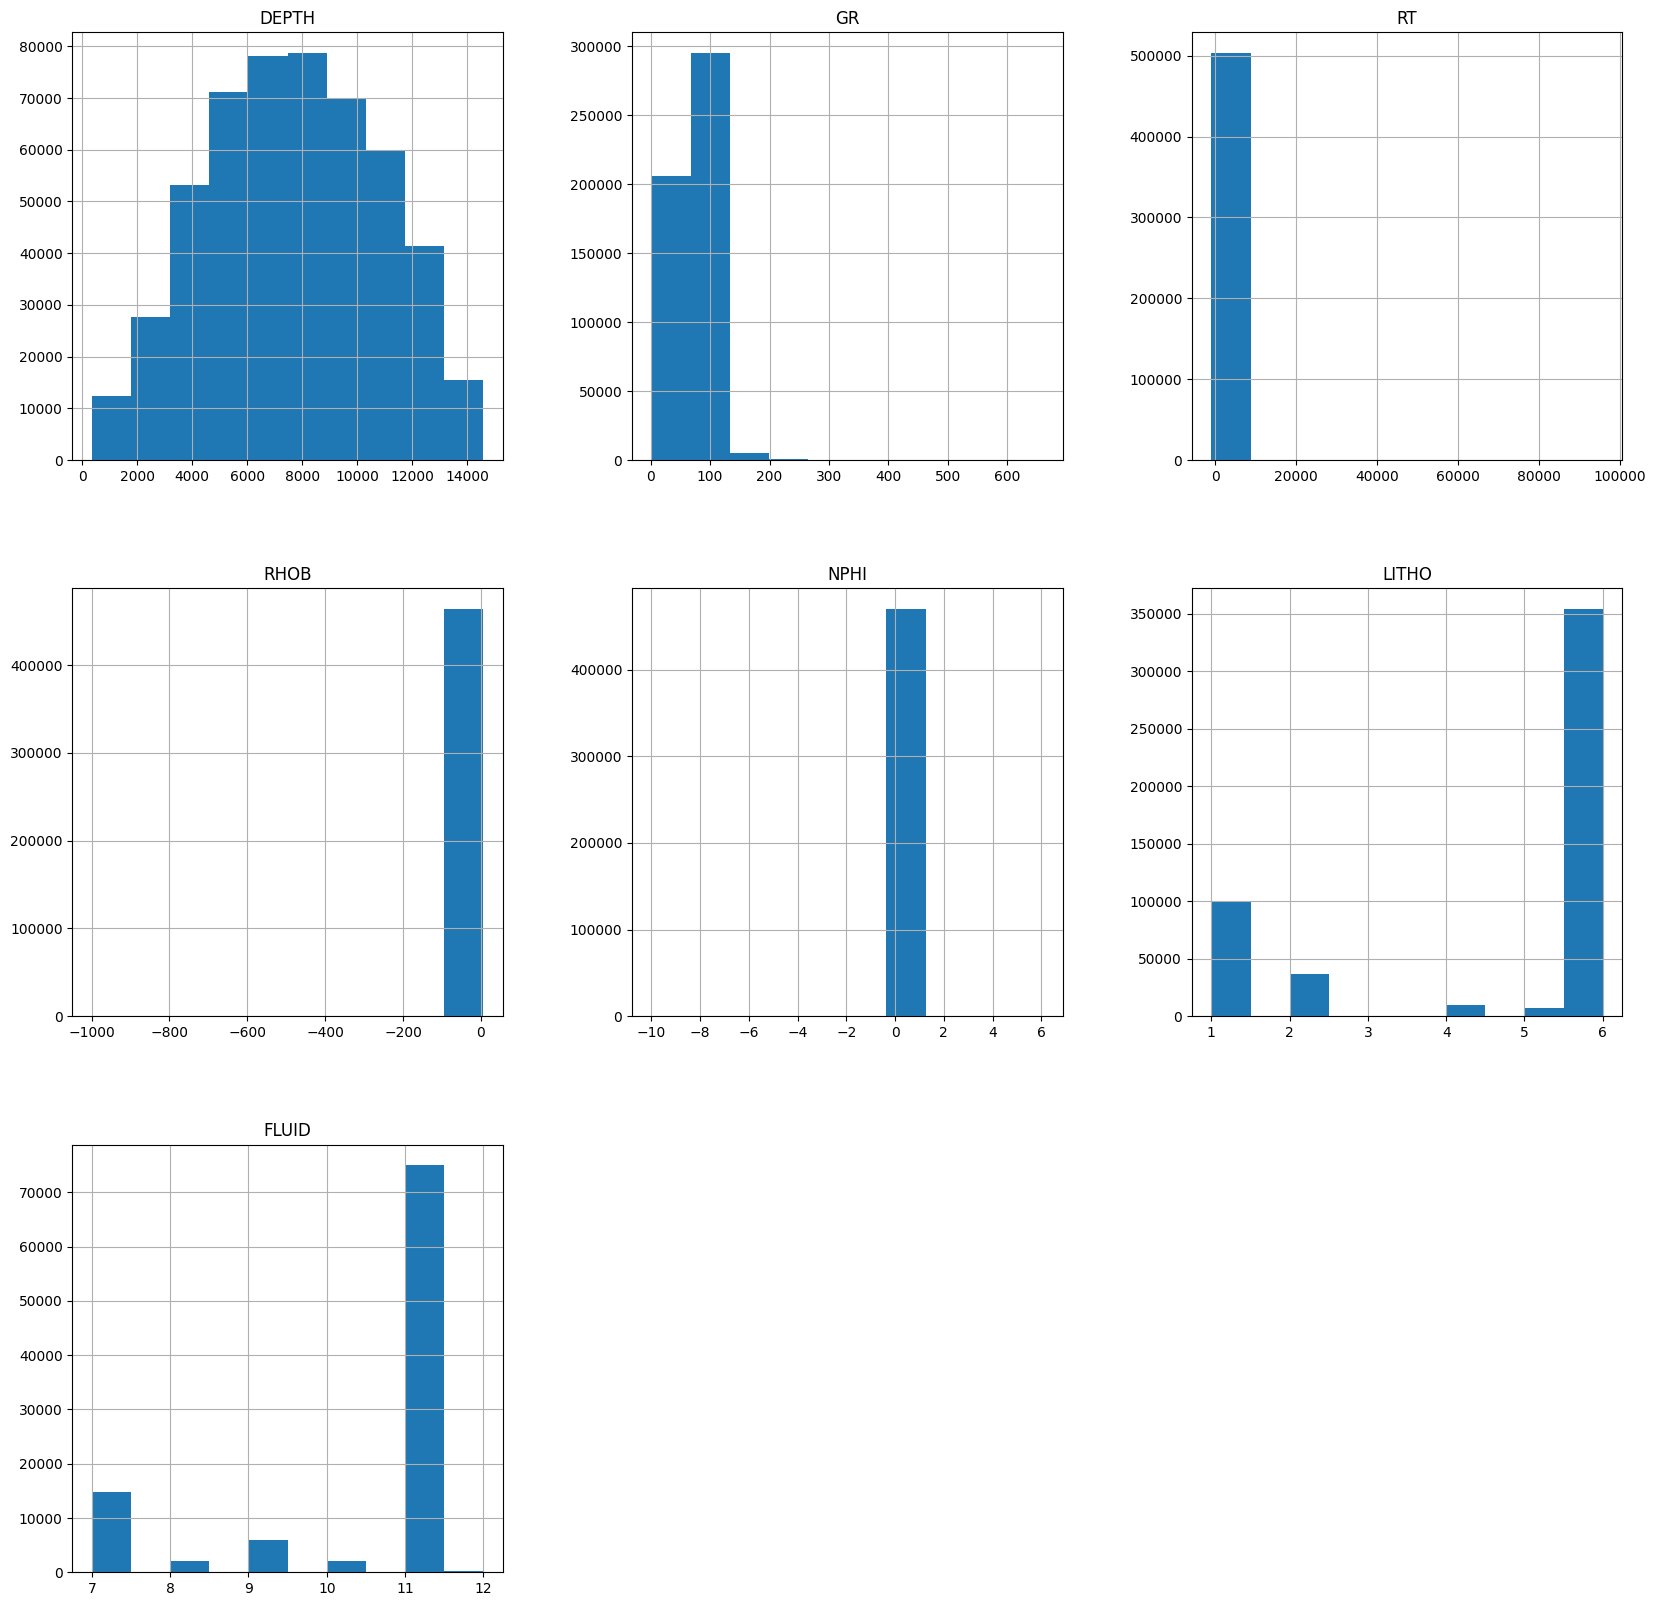

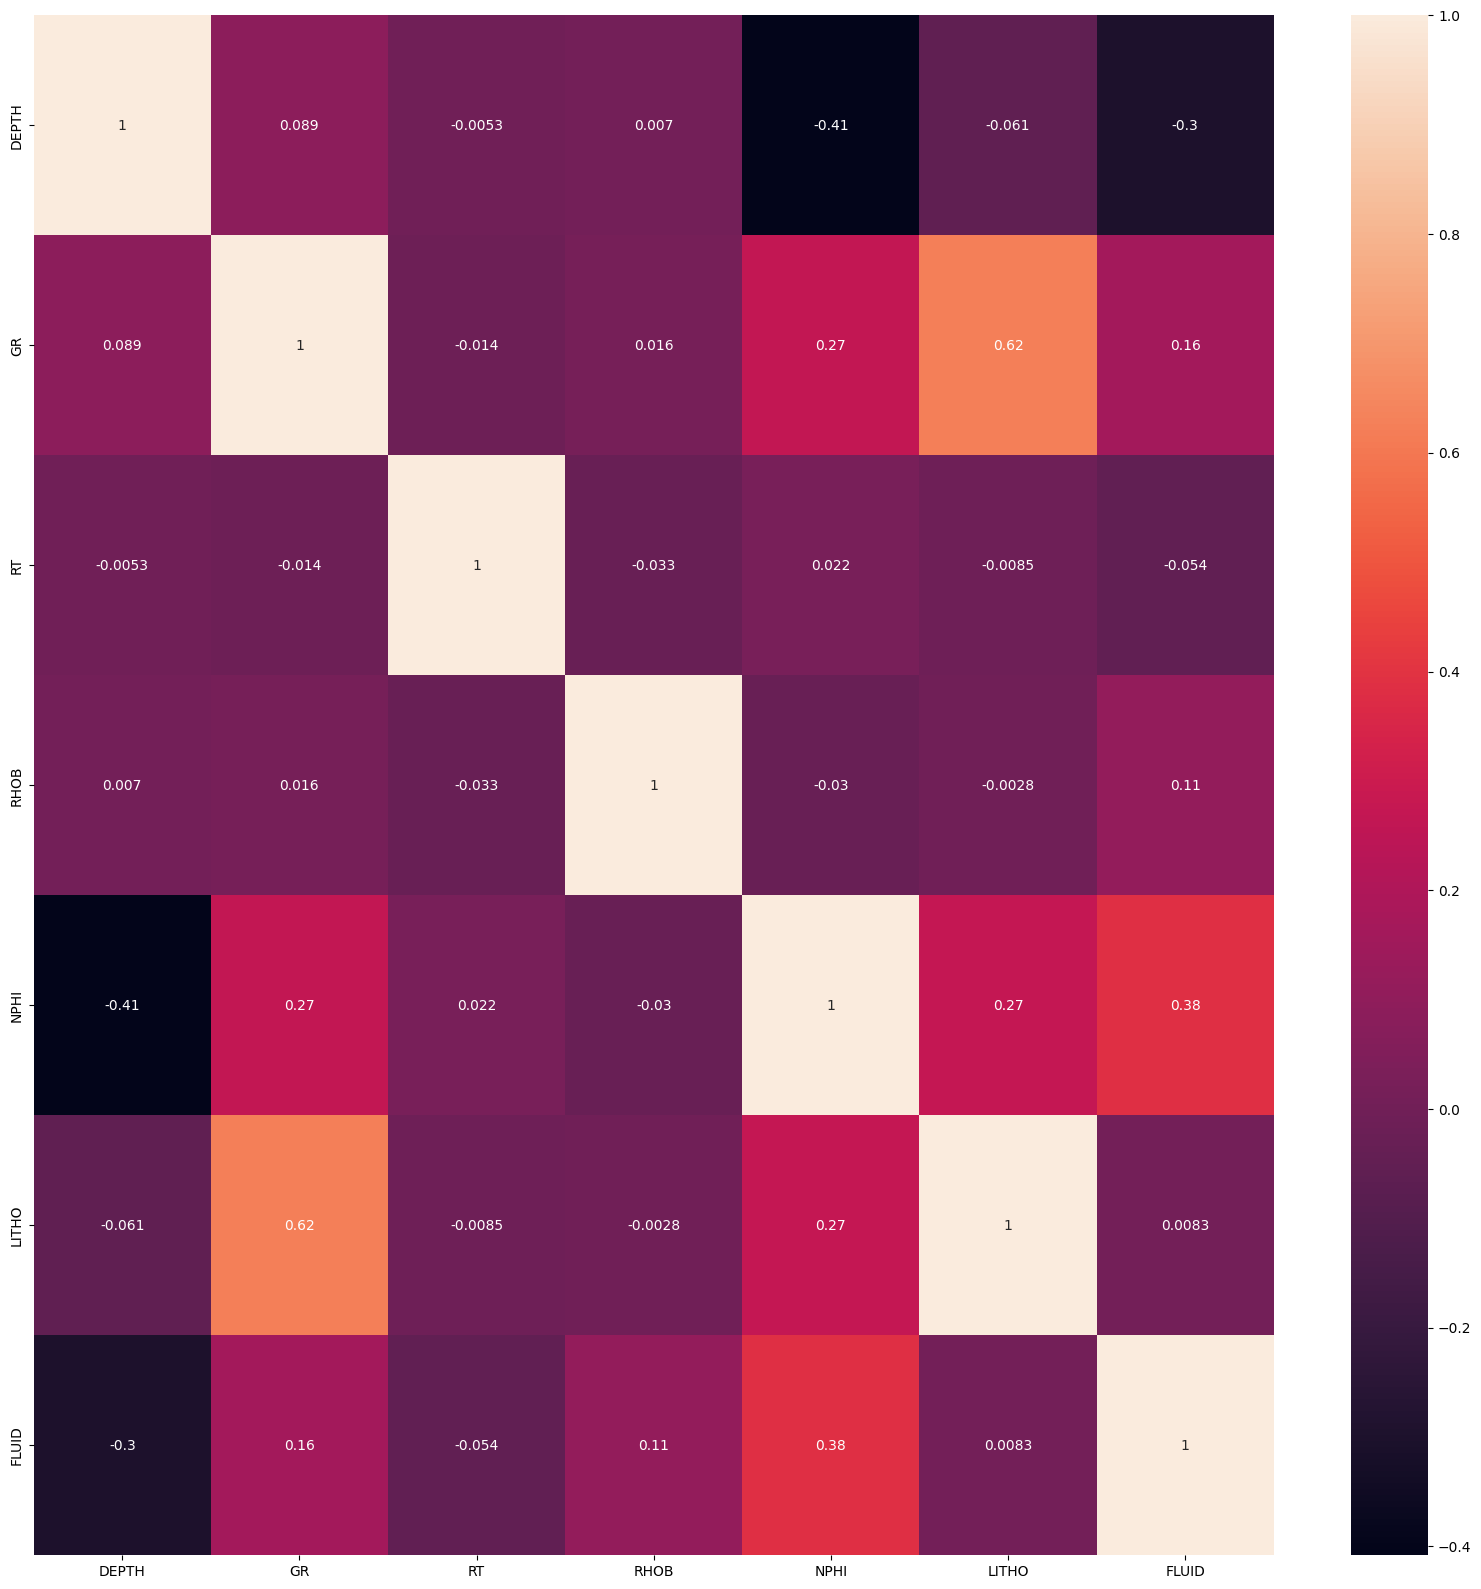

In [2]:
def eda(dftrain):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    #df shape
    print('Shape of dftrain')
    print(dftrain.shape)
    #df info
    print('Info of dftrain')
    print(dftrain.info())
    #df describe
    print('Describe of dftrain')
    print(dftrain.describe())
    #missing value
    print('Missing value of dftrain')
    print(dftrain.isnull().sum())
    #unique value
    print('Unique value of dftrain')
    print(dftrain.nunique())
    #histogram
    print('Histogram of dftrain')
    dftrain.hist(figsize=(20,20))
    #boxplot
    print('Boxplot of dftrain')
    dftrain.boxplot(figsize=(20,20))
    #correlation
    print('Correlation of dftrain')
    print(dftrain.corr())
    #heatmap
    print('Heatmap of dftrain')
    plt.figure(figsize=(20,20))
    sns.heatmap(dftrain.corr(),annot=True)
    plt.show()
    return dftrain
dftrain=eda(dftrain)

In [5]:
import pandas as pd

def handling_data(dftrain):
    # Handling missing values
    dftrain['FLUID'].fillna(dftrain['LITHO'], inplace=True)
    #Remove Missing Values
    dftrain.dropna(inplace=True)
    # Handling outliers IQR dftrain['RT']
    Q1 = dftrain['RT'].quantile(0.25)
    Q3 = dftrain['RT'].quantile(0.75)
    IQR = Q3 - Q1
    dftrain = dftrain[~((dftrain['RT'] < (Q1 - 1.5 * IQR)) |(dftrain['RT'] > (Q3 + 1.5 * IQR)))]
    return dftrain

# Assuming dftrain is a DataFrame

dftrain = handling_data(dftrain)
print(dftrain.head())


    DEPTH      TVDSS       GR      RT     NPHI    RHOB  VCALCITE   VQUARTZ  \
0  2682.5  2348.1693  82.6228  1.3123  0.41618  2.2475       0.0  0.318137   
1  2683.0  2348.5331  82.2134  1.2971  0.42060  2.2503       0.0  0.321467   
2  2683.5  2348.8969  80.7772  1.2996  0.41908  2.2553       0.0  0.333171   
3  2684.0  2349.2606  78.7567  1.3306  0.41448  2.2610       0.0  0.349355   
4  2684.5  2349.6244  77.0693  1.3839  0.41158  2.2656       0.0  0.362797   

      VSH  VCOAL  ...  VGAS      VOIL    VWATER      PHIT      PHIE     SWE  \
0  0.5607    0.0  ...   0.0  0.022064  0.099121  0.121185  0.121185  0.8179   
1  0.5579    0.0  ...   0.0  0.020945  0.099673  0.120619  0.120619  0.8264   
2  0.5463    0.0  ...   0.0  0.019725  0.100846  0.120571  0.120571  0.8364   
3  0.5296    0.0  ...   0.0  0.019181  0.101882  0.121063  0.121063  0.8416   
4  0.5158    0.0  ...   0.0  0.019672  0.101768  0.121440  0.121440  0.8380   

     PERM  LITHO  FLUID  Wells  
0  0.1252    6.0    6.0

In [6]:
dftrain['FLUID'] = dftrain['FLUID'].map({1: 0, 2: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8, 11: 9, 12: 10})

facies_labels = ['SST', 'LST', 'COAL', 'ORGSH', 'SH', 'Gas', 'PosGas', 'Oil', 'PosOil', 'WTR', 'WtrRise']

facies_colors = ['#F4D03F', '#F5B041', '#DC7633', '#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D', '#D35400', '#7D3C98']

facies_color_map = dict(zip(facies_labels, facies_colors))

def label_facies(row, labels):
    fluid = int(row['FLUID'])
    if 0 <= fluid < len(labels):
        return labels[fluid]
    else:
        return 'Unknown'

dftrain['facies_labels'] = dftrain.apply(lambda row: label_facies(row, facies_labels), axis=1)




In [7]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import numpy as np
    import pandas as pd
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    cluster=np.repeat(np.expand_dims(logs['FLUID'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 25))
    ax[0].plot(logs.GR, logs.DEPTH, '-g')
    ax[1].plot(logs.RT, logs.DEPTH, '-')
    ax[2].plot(logs.NPHI, logs.DEPTH, '-', color='0.40')
    ax[3].plot(logs.RHOB, logs.DEPTH, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=10)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_ticks(range(len(facies_labels)))
    cbar.set_ticklabels(facies_labels)

    # Adjust tick label properties
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.xticks(horizontalalignment='center')
    plt.yticks(horizontalalignment='center')
    plt.tick_params(axis='both', which='both', pad=20)
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RT")
    ax[1].set_xlim(logs.RT.min(),logs.RT.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel('Lithology')
    
    ax[0].set_yticklabels([]); ax[1].set_yticklabels([]); ax[2].set_yticklabels([])
    ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Wells'], fontsize=20,y=0.94)

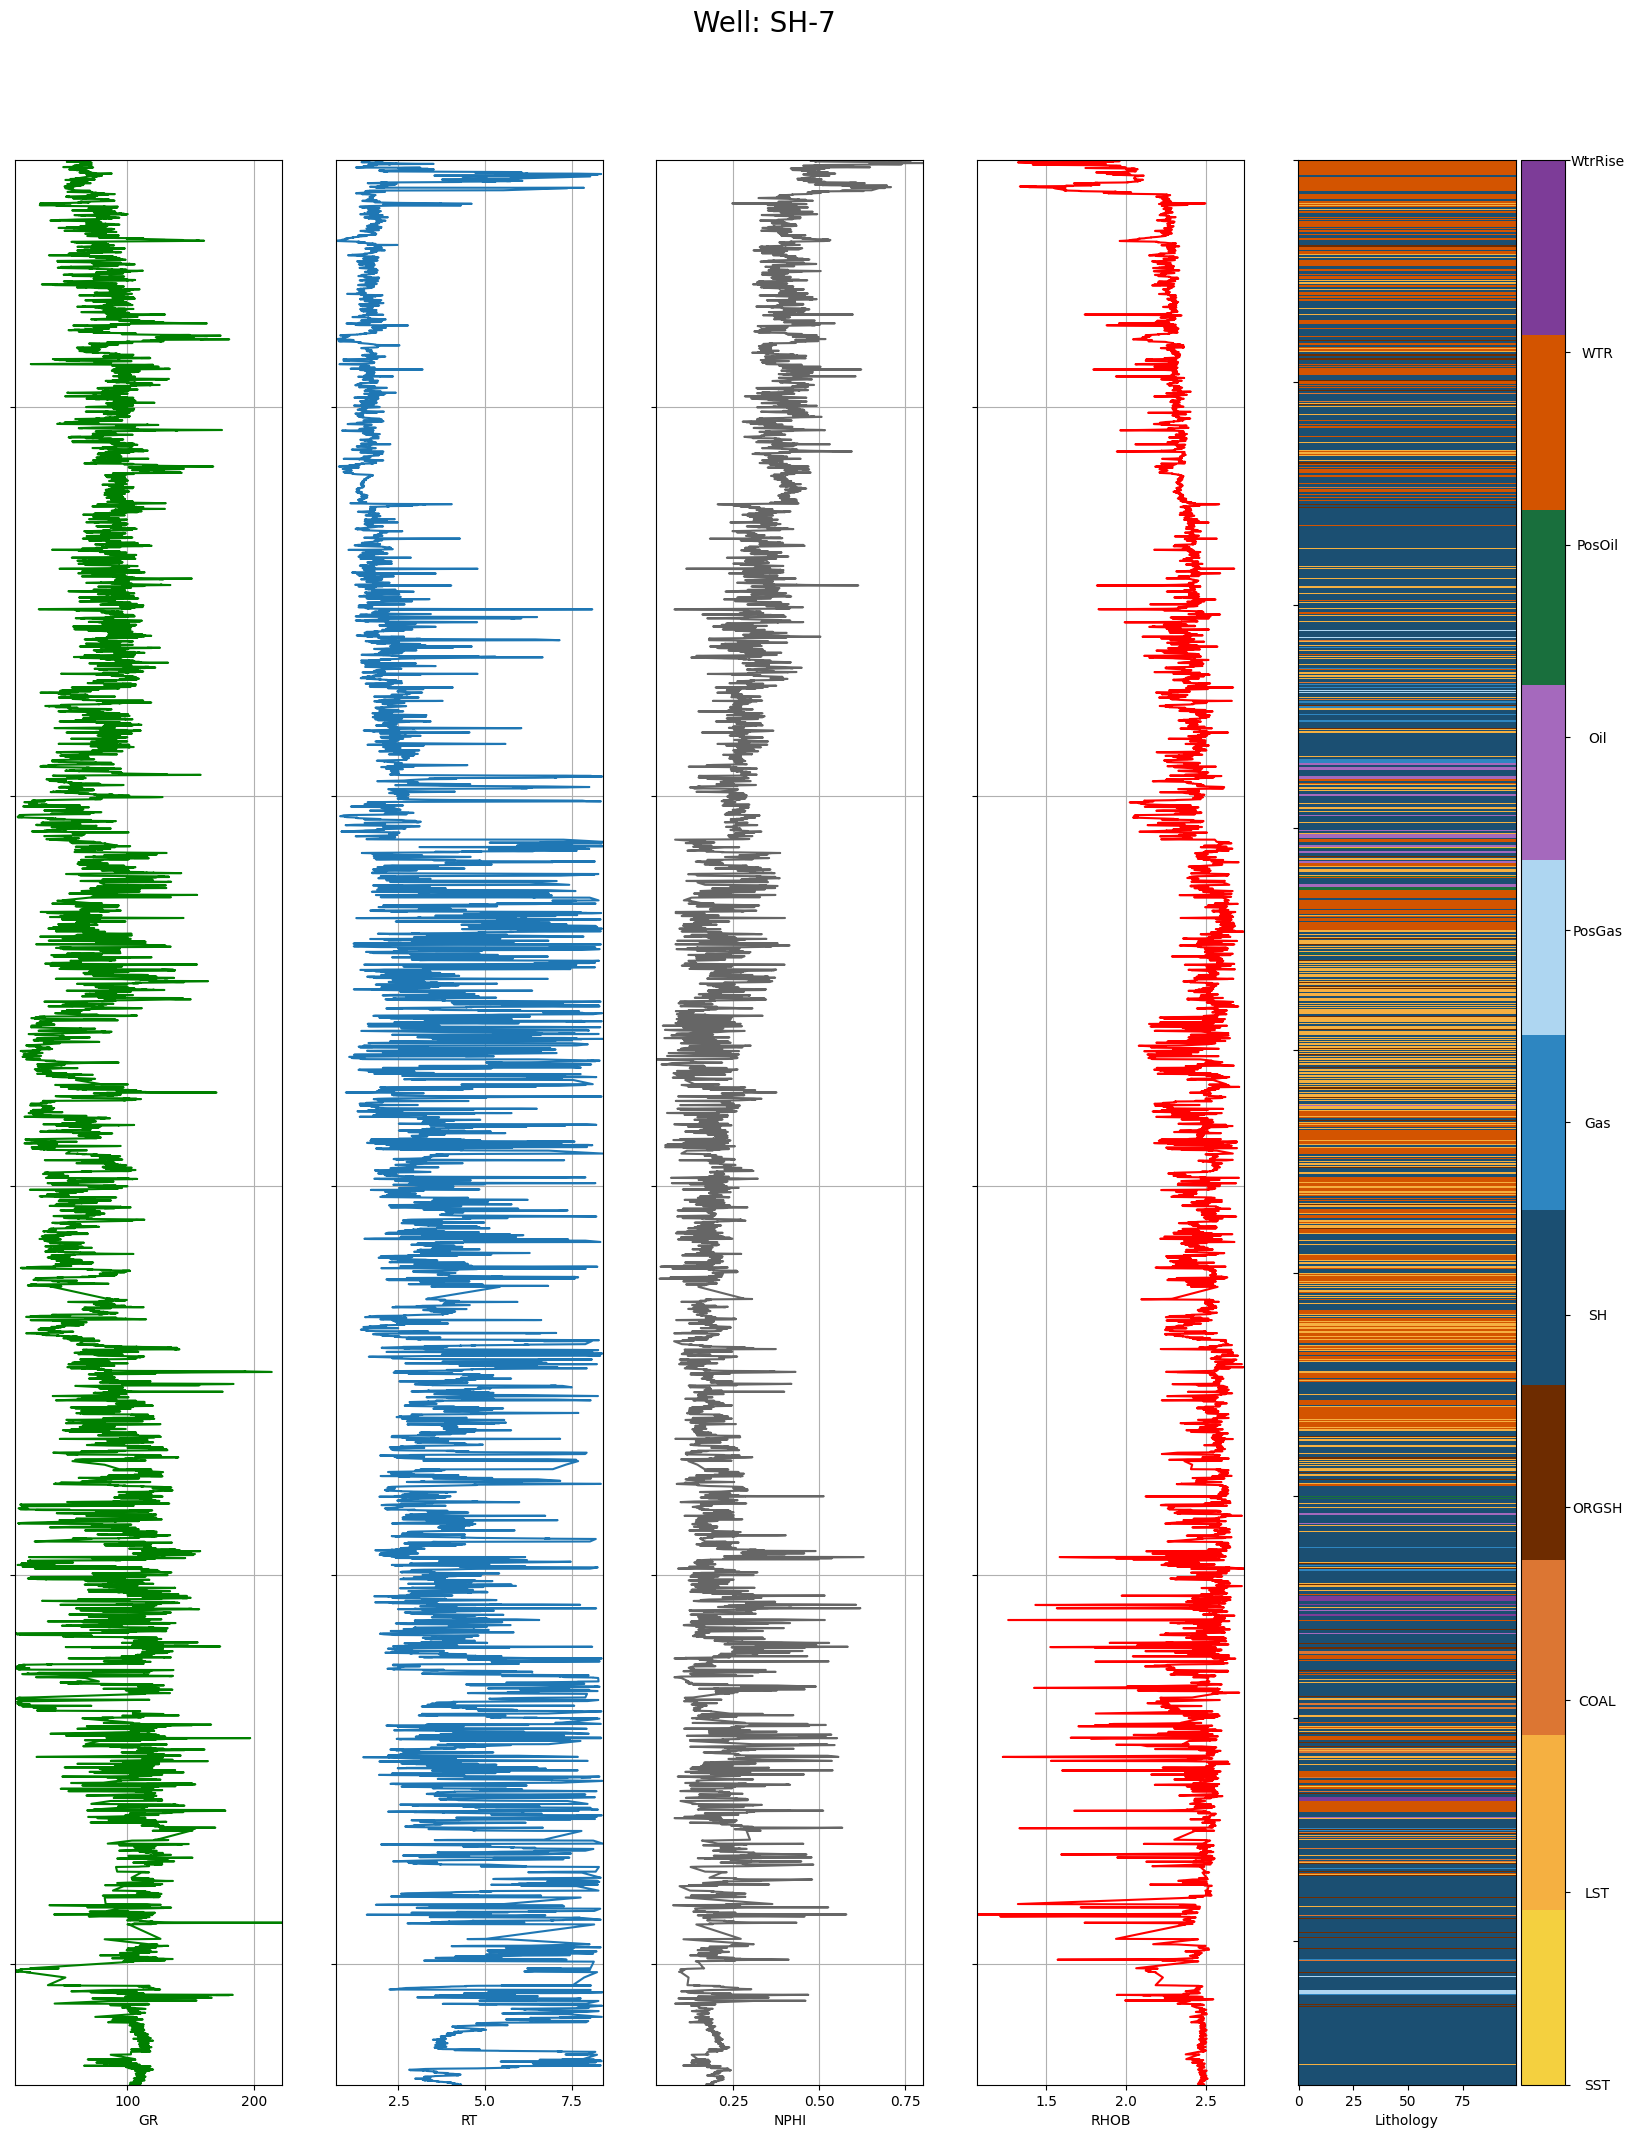

In [8]:
make_facies_log_plot(dftrain[dftrain['Wells'] == 'SH-7'],facies_colors)

In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33443 entries, 0 to 37295
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DEPTH          33443 non-null  float64
 1   TVDSS          33443 non-null  float64
 2   GR             33443 non-null  float64
 3   RT             33443 non-null  float64
 4   NPHI           33443 non-null  float64
 5   RHOB           33443 non-null  float64
 6   VCALCITE       33443 non-null  float64
 7   VQUARTZ        33443 non-null  float64
 8   VSH            33443 non-null  float64
 9   VCOAL          33443 non-null  float64
 10  VORGSH         33443 non-null  float64
 11  VGAS           33443 non-null  float64
 12  VOIL           33443 non-null  float64
 13  VWATER         33443 non-null  float64
 14  PHIT           33443 non-null  float64
 15  PHIE           33443 non-null  float64
 16  SWE            33443 non-null  float64
 17  PERM           33443 non-null  float64
 18  LITHO 

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def preprocess(dftrain):
    from sklearn.model_selection import train_test_split
    # Feature Selection
    X = dftrain.drop(['DEPTH','TVDSS','VWATER','Wells','FLUID','facies_labels'], axis=1)
    y = dftrain['FLUID']
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #Scalling the Data
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled= scaler.transform(X_test)

    # Resample the data
    sm = SMOTE(random_state=42)
    X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
    #print values after resampling
    print('After resampling:')
    print(y_train_sm.value_counts())


    return X_train_sm, y_train_sm, X_test_scaled,y_test

In [11]:
X_train_sm,y_train_sm,X_test_scaled,y_test=preprocess(dftrain)

After resampling:
5     16220
4     16220
9     16220
3     16220
1     16220
2     16220
8     16220
7     16220
10    16220
6     16220
0     16220
Name: FLUID, dtype: int64


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

def trainmodels(X_train_sm, y_train_sm, X_test_scaled, y_test):
    # create a list of models with their corresponding names
    models = [('DecisionTree', DecisionTreeClassifier()),
              ('RandomForest', RandomForestClassifier()),
              ('GradientBoosting', GradientBoostingClassifier()),
              ('XGBoost', XGBClassifier())]
    
    # train and evaluate models
    scores = []
    reports = []
    for name, model in models:
        model.fit(X_train_sm, y_train_sm)
        score = model.score(X_test_scaled, y_test)
        scores.append(score)
        
        print(name, ':', score)
        
        y_pred = model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred)
        reports.append(report)
        print(report)
    return scores, reports

    

In [13]:
# train and evaluate models
scores, reports = trainmodels(X_train_sm, y_train_sm, X_test_scaled, y_test)

DecisionTree : 0.9724921512931679
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      1.00      1.00      1048
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00       262
           4       1.00      1.00      1.00      4033
           5       0.58      0.71      0.64        52
           6       0.52      0.58      0.55        24
           7       0.45      0.53      0.49        68
           8       0.47      0.55      0.51        56
           9       0.95      0.91      0.93      1028
          10       0.63      0.81      0.71        36

    accuracy                           0.97      6689
   macro avg       0.76      0.80      0.78      6689
weighted avg       0.98      0.97      0.97      6689



KeyboardInterrupt: 

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

def train_deep(X_train_sm, X_test_scaled, y_train_sm, y_test):
    # Train with deep learning
    # Build the model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train_sm.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    # Check if running on an M1/M2 Mac
    if tf.config.list_physical_devices('GPU') and 'M1' in tf.config.list_physical_devices('GPU')[0].name:
        # Use legacy Keras optimizer on M1/M2 Macs
        optimizer = tf.keras.optimizers.legacy.Adam(0.001)
        print("Using legacy Keras optimizer on M1/M2 Macs.")
    else:
        optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['binary_accuracy'])

    # Train the model
    history = model.fit(
        X_train_sm,
        y_train_sm,
        validation_split=0.2,
        verbose=0,
        epochs=100)

    # Evaluate the model
    model.evaluate(X_test_scaled, y_test)
    return history


In [15]:
#train the model
history=train_deep(X_train_sm,X_test_scaled,y_train_sm,y_test)


2023-06-09 21:09:03.455305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-09 21:09:03.455742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



: 

: 